In [1]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def plot_graph(graph):
    # Detect weights for edges and set them as labels
    has_weights = False
    if any(map(lambda edge: "weight" in graph.edges[edge], graph.edges)):
        for edge in graph.edges:
            edge_attrs = graph.edges[edge]
            weight = edge_attrs.get("weight", None)
            edge_attrs["label"] = weight
            has_weights = True
    
    # First, try graphviz backup as it produces cleaner plots
    # It requires both 'graphviz' and 'pygraphviz' installed.
    try:
        a = to_agraph(graph)
        a.layout('dot') 
        return display(Image(a.draw(format="png")))
    # Fallback to matplotlib backend if graphviz isn't accessible.
    except Exception:
        
        fig, ax = plt.subplots()
        pos=nx.spring_layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax)
        if has_weights:
            labels = nx.get_edge_attributes(graph,'weight')
            nx.draw_networkx_edge_labels(graph, pos=pos, edge_labels=labels, ax=ax)
        fig.tight_layout()
        plt.show()

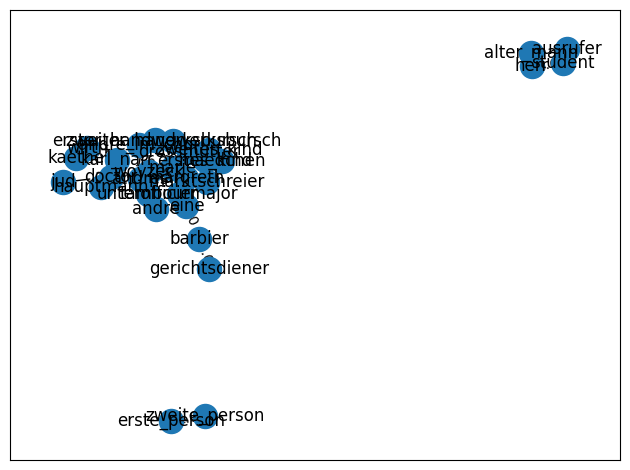

In [3]:
g = nx.read_graphml("D:/cravi/Documentsold/Uni/DH/Data Science/Projekte/Networks/ger000564-buechner-woyzeck.graphml")
plot_graph(g)

In [4]:
# Convert the graph into an adjacency matrix
adj_matrix = nx.adjacency_matrix(g).todense()
df = pd.DataFrame(adj_matrix, index=g.nodes(), columns=g.nodes())
df

,marktschreier,woyzeck,marie,tambourmajor,andres,karl_narr,barbier,maedchen,erstes_kind,zweites_kind,...,student,erster_handwerksbursch,zweiter_handwerksbursch,unterofficier,doctor,hauptmann,andre_im_chor,eine,andre,jud
marktschreier,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
woyzeck,1.0,0.0,10.0,2.0,10.0,3.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0
marie,2.0,10.0,0.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
tambourmajor,1.0,2.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
andres,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
karl_narr,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
barbier,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
maedchen,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
erstes_kind,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zweites_kind,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
degree_centrality = nx.degree_centrality(g)
closeness_centrality = nx.closeness_centrality(g)
betweenness_centrality = nx.betweenness_centrality(g)
centralities = pd.DataFrame({'Degree': degree_centrality,
                   'Closeness': closeness_centrality,
                   'Betweenness': betweenness_centrality})
centralities.index.name = 'nodes'
centralities

,Degree,Closeness,Betweenness
nodes,,,
marktschreier,0.103448,0.414577,0.000000
woyzeck,0.724138,0.701592,0.417077
marie,0.448276,0.536511,0.089491
tambourmajor,0.241379,0.467728,0.111658
andres,0.034483,0.380029,0.000000
karl_narr,0.137931,0.405364,0.002463
barbier,0.068966,0.309176,0.054187
maedchen,0.172414,0.414577,0.000000
erstes_kind,0.172414,0.414577,0.000000


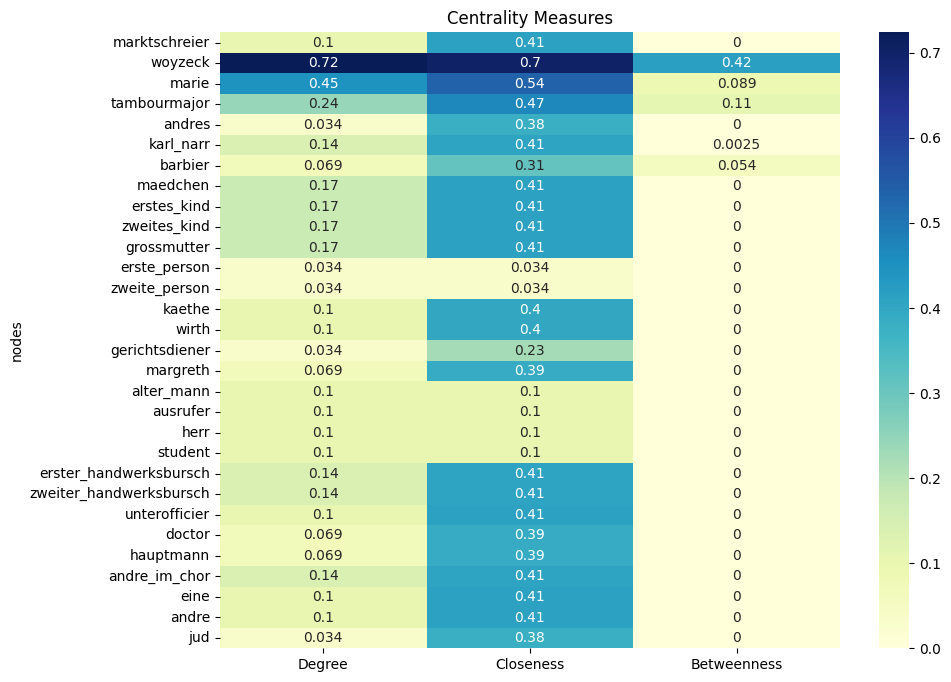

In [6]:
plt.figure(figsize=(10, 8))
sns.heatmap(centralities, annot=True , cmap="YlGnBu", annot_kws={'fontsize': 10})
plt.title("Centrality Measures")
plt.show()

In [7]:
att = nx.get_node_attributes(g, 'Number of spoken words')

In [8]:
centralities["spoken_words"] = att

In [9]:
centralities

,Degree,Closeness,Betweenness,spoken_words
nodes,,,,
marktschreier,0.103448,0.414577,0.000000,270
woyzeck,0.724138,0.701592,0.417077,2553
marie,0.448276,0.536511,0.089491,1010
tambourmajor,0.241379,0.467728,0.111658,192
andres,0.034483,0.380029,0.000000,346
karl_narr,0.137931,0.405364,0.002463,80
barbier,0.068966,0.309176,0.054187,308
maedchen,0.172414,0.414577,0.000000,36
erstes_kind,0.172414,0.414577,0.000000,29


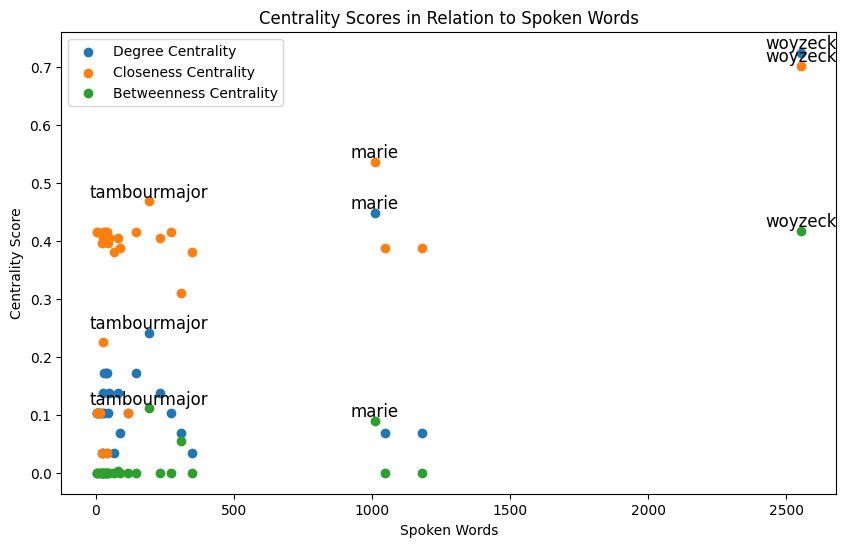

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(centralities['spoken_words'], centralities['Degree'], label='Degree Centrality')
plt.scatter(centralities['spoken_words'], centralities['Closeness'], label='Closeness Centrality')
plt.scatter(centralities['spoken_words'], centralities['Betweenness'], label='Betweenness Centrality')
plt.xlabel('Spoken Words')
plt.ylabel('Centrality Score')
plt.title('Centrality Scores in Relation to Spoken Words')
plt.legend()
# Annotate specific scatterplot dots with node names
annotated_nodes = ['woyzeck', 'marie', 'tambourmajor']  # Replace with the node names you want to annotate

for node in annotated_nodes:
    if node in centralities.index:
        row = centralities.loc[node]
        plt.text(row['spoken_words'], row['Degree'], node, ha='center', va='bottom', fontsize=12)
        plt.text(row['spoken_words'], row['Closeness'], node, ha='center', va='bottom', fontsize=12)
        plt.text(row['spoken_words'], row['Betweenness'], node, ha='center', va='bottom', fontsize=12)
plt.show()

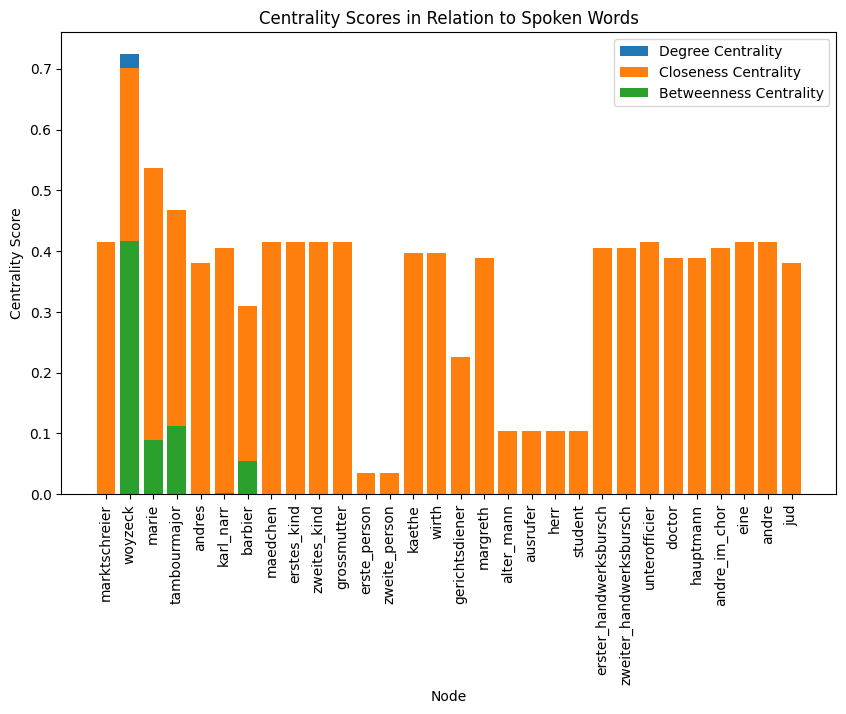

In [12]:
plt.figure(figsize=(10, 6))

# Define the positions of the bars on the x-axis
x = range(len(centralities))

# Plot the centrality scores
plt.bar(x, centralities['Degree'], label='Degree Centrality')
plt.bar(x, centralities['Closeness'], label='Closeness Centrality')
plt.bar(x, centralities['Betweenness'], label='Betweenness Centrality')

# Set the x-axis tick positions and labels
plt.xticks(x, centralities.index, rotation='vertical')

# Set the axis labels and the title
plt.xlabel('Node')
plt.ylabel('Centrality Score')
plt.title('Centrality Scores in Relation to Spoken Words')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [14]:
nx.get_node_attributes(g, 'Number of spoken words')

{'marktschreier': 270,
 'woyzeck': 2553,
 'marie': 1010,
 'tambourmajor': 192,
 'andres': 346,
 'karl_narr': 80,
 'barbier': 308,
 'maedchen': 36,
 'erstes_kind': 29,
 'zweites_kind': 39,
 'grossmutter': 144,
 'erste_person': 23,
 'zweite_person': 40,
 'kaethe': 45,
 'wirth': 21,
 'gerichtsdiener': 25,
 'margreth': 87,
 'alter_mann': 14,
 'ausrufer': 117,
 'herr': 4,
 'student': 10,
 'erster_handwerksbursch': 233,
 'zweiter_handwerksbursch': 49,
 'unterofficier': 28,
 'doctor': 1182,
 'hauptmann': 1046,
 'andre_im_chor': 27,
 'eine': 4,
 'andre': 2,
 'jud': 67}

In [20]:
print(centralities['Closeness'].nlargest(5))
print(centralities['Betweenness'].nlargest(5))
print(centralities['Degree'].nlargest(5))

nodes
woyzeck          0.701592
marie            0.536511
tambourmajor     0.467728
marktschreier    0.414577
maedchen         0.414577
Name: Closeness, dtype: float64
nodes
woyzeck         0.417077
tambourmajor    0.111658
marie           0.089491
barbier         0.054187
karl_narr       0.002463
Name: Betweenness, dtype: float64
nodes
woyzeck         0.724138
marie           0.448276
tambourmajor    0.241379
maedchen        0.172414
erstes_kind     0.172414
Name: Degree, dtype: float64
